#### Supervised Learning : Naive Bayes Classification (Gaussian Naive Bayes)

Visualizing the data set to decide which ML model should be used ?

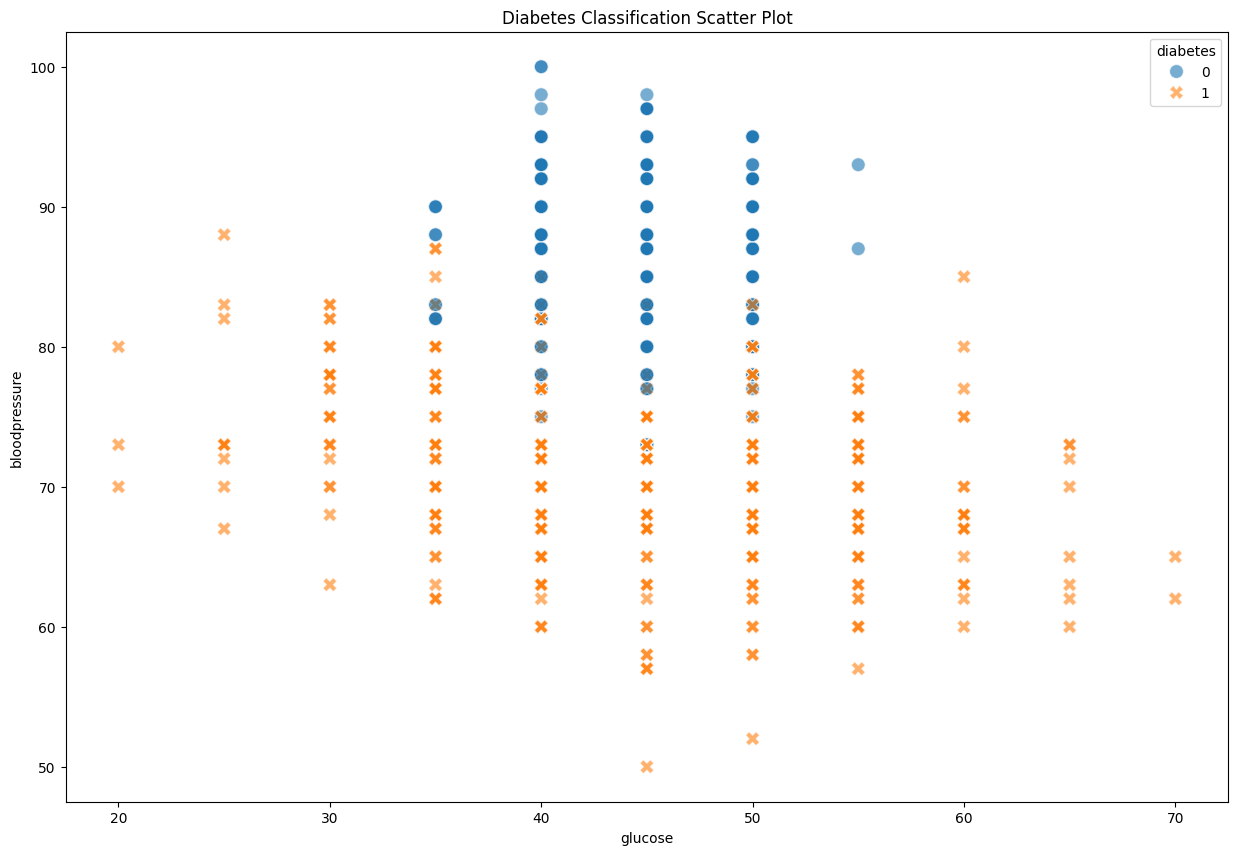

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('NaiveBayesClassificationData.csv')

# Separate features and target
features = data[['glucose', 'bloodpressure']]
target = data['diabetes']

# Create visualization using seaborn
plt.figure(figsize=(15, 10))

sns.scatterplot(data=data,                # Specifies the DataFrame to use for the plot (e.g., 'data').
                x='glucose',              # Sets the 'glucose' column as the x-axis values.
                y='bloodpressure',        # Sets the 'bloodpressure' column as the y-axis values.
                hue='diabetes',           # Colors the points based on the 'diabetes' column (e.g., categories like Yes/No).
                style='diabetes',         # Varies the marker style (e.g., circle, square) based on the 'diabetes' column.
                s=100,                    # Sets the size of the markers (points) to 100.
                alpha=0.6)                # Adjusts the transparency of the markers (0 = fully transparent, 1 = fully opaque).

plt.title('Diabetes Classification Scatter Plot')
plt.show()

As we can see that the points of the scatter-plot are divided into two sub sections that is, diabetic {1} and non-diabetic {0} hence we shall opt for a Gaussian Naive Bayes Classification Model to predict the value of continuous "unseen" data. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features.values, target)

# Create and train the Naive Bayes classifier
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

Model is ready !! Now lets predict some values using ML

In [10]:
# Prediction function
def predict_diabetes(glucose, bloodpressure):
    
    glucose = float(glucose)
    bloodpressure = float(bloodpressure)
    
    # Make a prediction using the trained model
    prediction = model.predict([[glucose, bloodpressure]])
    if prediction[0]==0:
        return "Non-Diabetic"
    else :
        return "Diabetic"
    

# Example usage
glucose_input = input("Enter glucose level: ")
bloodpressure_input = input("Enter blood pressure level: ")
print("Prediction:", predict_diabetes(glucose_input, bloodpressure_input))


Prediction: Non-Diabetic


Evaluation of Model Accuracy and genrating Classification Report

In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(x_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', round(accuracy,2)*100,"%")

# Print detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy Score:  94.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       125
           1       0.94      0.94      0.94       124

    accuracy                           0.94       249
   macro avg       0.94      0.94      0.94       249
weighted avg       0.94      0.94      0.94       249

